In [14]:
import pyinsurance
from pyinsurance.pymolder import tipp_model
from pyinsurance.data.IRX import load as d1
from pyinsurance.data.sp500 import load as d2
from pyinsurance.Metric_Generator.returns_metrics import Cumulative_ret
import matplotlib.pyplot as plt 

risk_Asset = d2()
safe_Asset = d1()/52


In [20]:
lock_in_rate = 0.05
mcr = 0.40
tfci = 0.80
fund = 100
floor = 0.80
multiplier = 10
Benchmark_return = risk_Asset
Rebalancement_frequency = 52 # once a week -> 52 weeks a year

In [21]:
res = tipp_model(risk_Asset,safe_Asset,lock_in_rate,mcr,tfci,fund,\
                floor,multiplier,risk_Asset,Rebalancement_frequency)

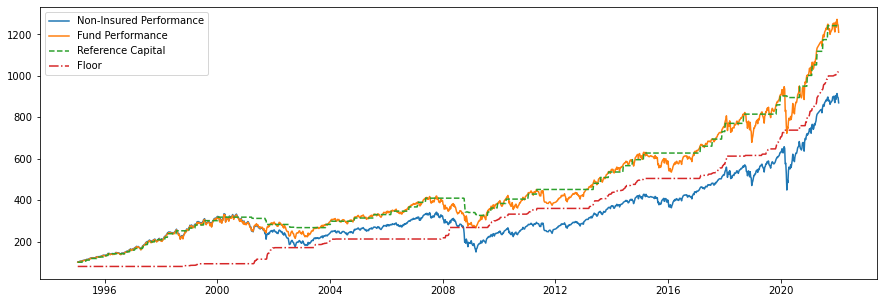

In [22]:
import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(15,5))
ax0 = fig.add_subplot(111)
plt.plot(risk_Asset.index,Cumulative_ret(risk_Asset)*100,label = 'Non-Insured Performance')
plt.plot(risk_Asset.index,res.Fund,label = 'Fund Performance')
plt.plot(risk_Asset.index,res.Reference_capital,label = 'Reference Capital',linestyle="--")
plt.plot(risk_Asset.index,res.floor,label = 'Floor',linestyle="-.")
plt.legend()
plt.show()

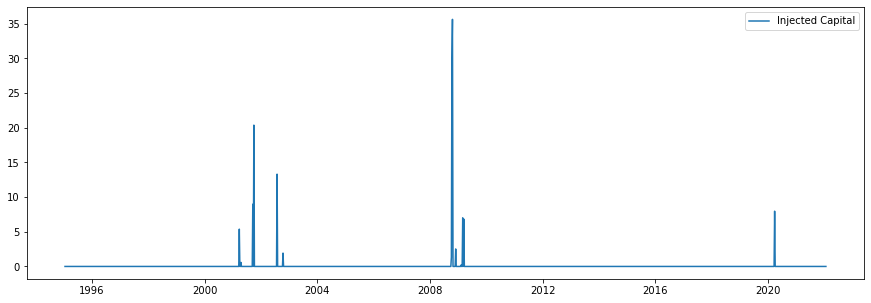

In [23]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(111)
plt.plot(risk_Asset.index,res.capital_reinjection,label = 'Injected Capital')
plt.legend()
plt.show()